# LIMEtree experiments

In [1]:
import logging
import pickle

import numpy as np
import scripts.image_classifier as imgclf

from scripts.limetree import (
    logger,
    explain_image,
    compute_loss, process_loss, summarise_loss_lime, summarise_loss_limet,
    plot_loss_summary, tabulate_loss_summary)

24-Feb-03 15:19:03 fatf.utils.array.tools INFO     Using numpy's numpy.lib.recfunctions.structured_to_unstructured as fatf.utils.array.tools.structured_to_unstructured and fatf.utils.array.tools.structured_to_unstructured_row.


In [2]:
! mkdir -p _figures

# logging.basicConfig(level=logging.DEBUG)
logger.setLevel(logging.DEBUG)

%matplotlib inline

In [ ]:
clf = imgclf.ImageClassifier(use_gpu=False)
img_path = './img/dog_ball.jpg'

## Test Processing Images

In [ ]:
img_path_, top_pred, similarities, lime, limet = explain_image(
    img_path, clf, random_seed=42, n_top_classes=3,
    batch_size=50,                              # Processing
    segmenter_type='slic',                      # Segmenter Type
    n_segments=13,                              # Slic Segmenter
    occlusion_colour='black',                   # Occluder
    generate_complete_sample=True,              # Sampler
    kernel_width=0.25)                          # Similarity

In [ ]:
assert img_path == img_path_, 'Expect the same image'
assert np.array_equal(top_pred, [852, 207, 208]), 'Expect correct predictions'

## Run Sample Processor

In [ ]:
sample_images = [img_path]
collector = {}

for img in sample_images:
    img_path_, top_pred, similarities, lime, limet = explain_image(
        img, clf, random_seed=42, n_top_classes=3,
        batch_size=50,                              # Processing
        segmenter_type='slic',                      # Segmenter Type
        n_segments=13,                              # Slic Segmenter
        occlusion_colour='black',                   # Occluder
        generate_complete_sample=True,              # Sampler
        kernel_width=0.25)                          # Similarity
    logger.debug(f'Processed image: {img_path_}')
    collector[img_path_] = (top_pred, similarities, lime, limet)

In [ ]:
with open('limet_sample.pickle', 'wb') as w_file:
    pickle.dump(collector, w_file,
                protocol=pickle.HIGHEST_PROTOCOL)


## Analyse Data

In [3]:
#source = 'processed_limetree_1835.pickle'
#source = 'processed_limetree_cifar10_9714.pickle'
source = 'processed_limetree_cifar100_9665.pickle'
with open(source, 'rb') as r_file:
    collector = pickle.load(r_file)

In [4]:
lime_scores_summary, limet_scores_summary = collector

In [ ]:
print(f'Number of processed images: {len(collector.keys())}')

In [ ]:
top_classes, lime_scores, limet_scores = process_loss(collector)

In [ ]:
lime_scores_summary = summarise_loss_lime(lime_scores, top_classes)

In [ ]:
limet_scores_summary = summarise_loss_limet(limet_scores, top_classes)

Saving to: _figures/loss-cls1-lime_weighted_Xrandom.pdf


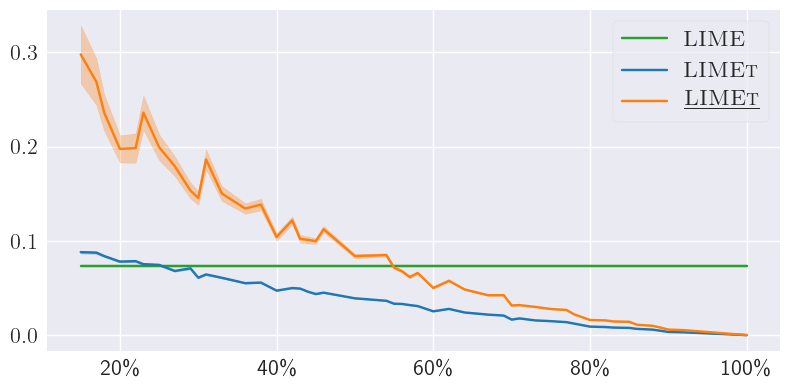

In [5]:
# NBVAL_IGNORE_OUTPUT
plot_loss_summary(lime_scores_summary, limet_scores_summary,
                  1, use_limet_loss=not True,
                  use_weighted=True, use_random=False)

In [6]:
tabulate_loss_summary(lime_scores_summary, limet_scores_summary, 1,
                      0.33, scale_factor=100, latex=True,
                      use_limet_loss=not True, use_weighted=True, use_random=False)

\(7.34\pm0.09\)
\(6.08\pm0.08\)
\(15.03\pm0.78\)


{'lime': (0.07338428436144662, 0.0008745278010946789),
 'limet': (0.06084791851237332, 0.0007592370748242332),
 'limetf': (0.15028763921051025, 0.007833422324405488)}